In [1]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

Using TensorFlow backend.


In [2]:
input_img = Input(shape=(28, 28, 1))  

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

ae = Model(input_img, decoded)
ae.compile(optimizer='adadelta', loss='binary_crossentropy')

In [3]:
from keras.datasets import fashion_mnist
import numpy as np

(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1)) 

In [4]:
ae.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 71s 1ms/step - loss: 0.3698 - val_loss: 0.3264
Epoch 2/50
60000/60000 [==============================] - 69s 1ms/step - loss: 0.3232 - val_loss: 0.3164
Epoch 3/50
60000/60000 [==============================] - 72s 1ms/step - loss: 0.3142 - val_loss: 0.3141
Epoch 4/50
60000/60000 [==============================] - 72s 1ms/step - loss: 0.3100 - val_loss: 0.3152
Epoch 5/50
60000/60000 [==============================] - 73s 1ms/step - loss: 0.3071 - val_loss: 0.3156
Epoch 6/50
60000/60000 [==============================] - 72s 1ms/step - loss: 0.3049 - val_loss: 0.3075
Epoch 7/50
60000/60000 [==============================] - 71s 1ms/step - loss: 0.3028 - val_loss: 0.3009
Epoch 8/50
60000/60000 [==============================] - 71s 1ms/step - loss: 0.3011 - val_loss: 0.2989
Epoch 9/50
60000/60000 [==============================] - 71s 1ms/step - loss: 0.3003 - val_loss: 0.3007
Epoch

In [7]:
d_imgs = ae.predict(x_test)

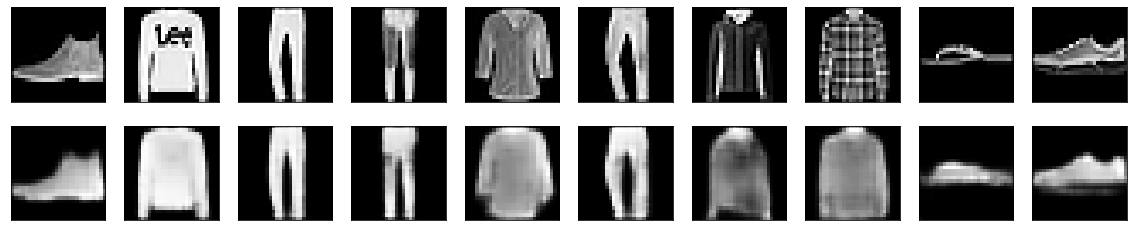

In [8]:
import matplotlib
%matplotlib inline

from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(d_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


### Usamos autoencoder profundo

In [47]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [48]:
input_img= Input(shape=(784, ))

In [49]:
encoded = Dense(units = 128, activation = 'relu')(input_img)
encoded = Dense(units = 64, activation = 'relu')(encoded)
encoded = Dense(units = 32, activation = 'relu')(encoded)

decoded = Dense(units = 64, activation='relu')(encoded)
decoded = Dense(units = 128, activation='relu')(decoded)
decoded = Dense(units = 784, activation = 'sigmoid')(decoded)

In [50]:
autoencoder = Model(input_img, decoded)

In [51]:
encoder = Model(input_img, encoded)

In [52]:
autoencoder.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_19 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_20 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_21 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_22 (Dense)             (None, 784)               101

In [53]:
encoder.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_19 (Dense)             (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [64]:
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [65]:
autoencoder_train = autoencoder.fit(X_train, X_train,
                                    epochs = 100,
                                    batch_size = 64,
                                    shuffle = True,
                                    validation_data = (X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 11s 189us/step - loss: 0.2721 - accuracy: 0.5086 - val_loss: 0.2748 - val_accuracy: 0.5064
Epoch 2/100
60000/60000 [==============================] - 13s 222us/step - loss: 0.2718 - accuracy: 0.5087 - val_loss: 0.2746 - val_accuracy: 0.5064
Epoch 3/100
60000/60000 [==============================] - 14s 236us/step - loss: 0.2715 - accuracy: 0.5087 - val_loss: 0.2744 - val_accuracy: 0.5064
Epoch 4/100
60000/60000 [==============================] - 14s 225us/step - loss: 0.2714 - accuracy: 0.5087 - val_loss: 0.2742 - val_accuracy: 0.5064
Epoch 5/100
60000/60000 [==============================] - 14s 239us/step - loss: 0.2712 - accuracy: 0.5087 - val_loss: 0.2742 - val_accuracy: 0.5064
Epoch 6/100
60000/60000 [==============================] - 14s 237us/step - loss: 0.2710 - accuracy: 0.5087 - val_loss: 0.2737 - val_accuracy: 0.5064
Epoch 7/100
60000/60000 [=========================

Epoch 55/100
60000/60000 [==============================] - 15s 250us/step - loss: 0.2680 - accuracy: 0.5090 - val_loss: 0.2707 - val_accuracy: 0.5067
Epoch 56/100
60000/60000 [==============================] - 17s 285us/step - loss: 0.2680 - accuracy: 0.5090 - val_loss: 0.2708 - val_accuracy: 0.5067
Epoch 57/100
60000/60000 [==============================] - 15s 251us/step - loss: 0.2680 - accuracy: 0.5090 - val_loss: 0.2709 - val_accuracy: 0.5067
Epoch 58/100
60000/60000 [==============================] - 12s 204us/step - loss: 0.2679 - accuracy: 0.5090 - val_loss: 0.2710 - val_accuracy: 0.5067
Epoch 59/100
60000/60000 [==============================] - 13s 209us/step - loss: 0.2679 - accuracy: 0.5090 - val_loss: 0.2708 - val_accuracy: 0.5067
Epoch 60/100
60000/60000 [==============================] - 12s 194us/step - loss: 0.2679 - accuracy: 0.5090 - val_loss: 0.2707 - val_accuracy: 0.5067
Epoch 61/100
60000/60000 [==============================] - 11s 178us/step - loss: 0.2679 - ac

In [68]:
encoded_imgs = encoder.predict(X_test)
encoded_imgs.shape
predicted = autoencoder.predict(X_test)

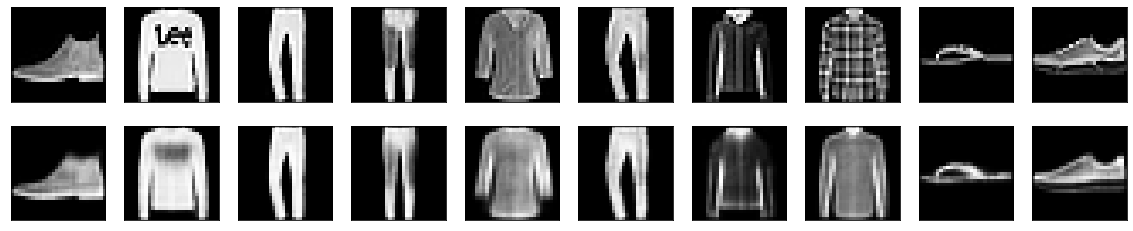

In [69]:
import matplotlib
%matplotlib inline

from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()